# G2M EDA for cab investment firm
### Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing Datasets

In [ ]:
transaction_data=pd.read_csv('/content/Transaction_ID.csv')
transaction_data

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [ ]:
cust_data=pd.read_csv('/content/Customer_ID.csv')
cust_data

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [ ]:
city_data=pd.read_csv('/content/City.csv')
city_data

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [ ]:
cab_data=pd.read_csv('/content/Cab_Data.csv')
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,08-01-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,04-01-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,05-01-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,05-01-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [ ]:
holiday_data=pd.read_csv('/content/US Holiday Dates (2004-2021).csv')
holiday_data

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
...,...,...,...,...,...,...
337,2006-04-16,Western Easter,Sunday,4,16,2006
338,2017-04-16,Western Easter,Sunday,4,16,2017
339,2014-04-20,Western Easter,Sunday,4,20,2014
340,2019-04-21,Western Easter,Sunday,4,21,2019


## Understanding the datasets

In [ ]:
transaction_data.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [ ]:
city_data.isna().sum()

City          0
Population    0
Users         0
dtype: int64

In [ ]:
cab_data.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [ ]:
cust_data.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [ ]:
holiday_data.isna().sum()

Date       0
Holiday    0
WeekDay    0
Month      0
Day        0
Year       0
dtype: int64

In [ ]:
transaction_data.duplicated().sum()

0

In [ ]:
cust_data.duplicated().sum()

0

In [ ]:
city_data.duplicated().sum()

0

In [ ]:
cab_data.duplicated().sum()

0

In [ ]:
holiday_data.duplicated().sum()

0

In [ ]:
transaction_data['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

In [ ]:
cust_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
negative_incomes = cust_data[cust_data['Income (USD/Month)'] < 0]
if negative_incomes.empty:
  print("There are no negative values in 'Income (USD/Month)'")
else:
  print(negative_incomes)

There are no negative values in 'Income (USD/Month)'


In [ ]:
columns_to_check = ['KM Travelled', 'Price Charged', 'Cost of Trip']
negative_values = []

for col in columns_to_check:
  negative_values_in_col = cab_data[cab_data[col] < 0]
  if not negative_values_in_col.empty:
    negative_values.append((col, negative_values_in_col))

if not negative_values:
  print("There are no negative values in", columns_to_check)
else:
  print("Negative values found in:")
  for col, data in negative_values:
    print(f"\t- {col}:")
    print(data)

There are no negative values in ['KM Travelled', 'Price Charged', 'Cost of Trip']


In [ ]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [ ]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [ ]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


In [ ]:
transaction_data.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [ ]:
cust_data.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [ ]:
city_data.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [ ]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [ ]:
holiday_data.describe()

,Month,Day,Year
count,342.000000,342.000000,342.000000
mean,7.263158,15.853801,2012.500000
std,3.899889,9.653330,5.195729
min,1.000000,1.000000,2004.000000
25%,4.000000,6.000000,2008.000000
50%,9.000000,16.500000,2012.500000
75%,11.000000,24.000000,2017.000000
max,12.000000,31.000000,2021.000000


## EDA on datasets


Proportion of Total Card Customers: 59.98 %
Proportion of Total Cash Customers: 40.02 %


Text(0, 0.5, 'Count')

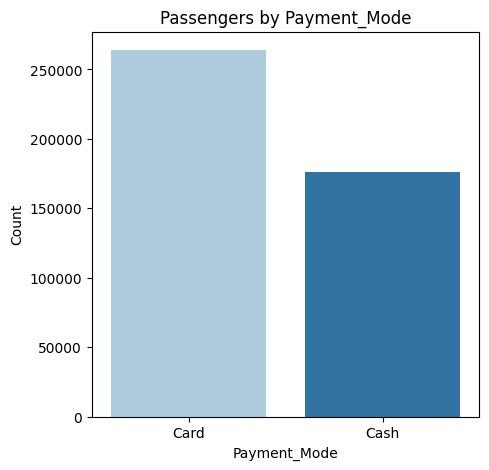

In [ ]:
#Payment_Mode Proportion

card_proportion = (transaction_data.Payment_Mode.value_counts(normalize=True)[0] * 100).round(2)
cash_proportion = (transaction_data.Payment_Mode.value_counts(normalize=True)[1] * 100).round(2)

print(f'Proportion of Total Card Customers: {card_proportion} %')
print(f'Proportion of Total Cash Customers: {cash_proportion} %')

plt.figure(figsize=(5,5))
colors=['skyblue','purple']
sns.countplot(x="Payment_Mode", hue="Payment_Mode", data=transaction_data, palette="Paired").set_title("Passengers by Payment_Mode")
plt.xlabel("Payment_Mode")
plt.ylabel("Count")

Clear in the visual, Customers use card over cash

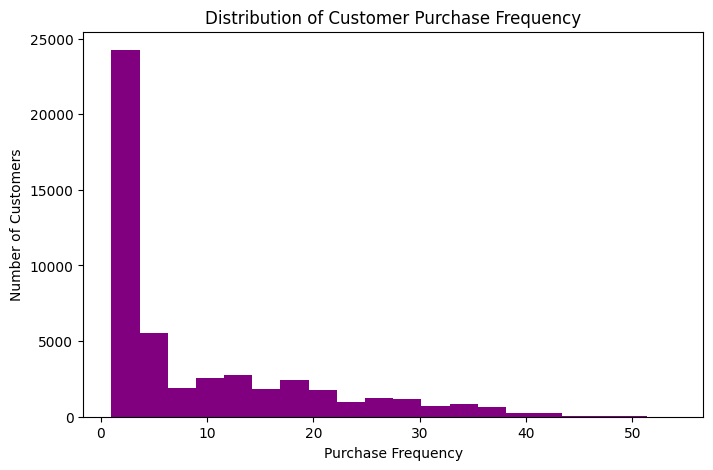

In [ ]:
#Purchase frequency of customers
customer_purchase_freq = transaction_data.groupby('Customer ID')['Transaction ID'].count()

plt.figure(figsize=(8, 5))
plt.hist(customer_purchase_freq, bins=20, color='purple')
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Purchase Frequency')
plt.show()

Clear in the visual,the number of customers tends to decrease as the purchase frequency increases.

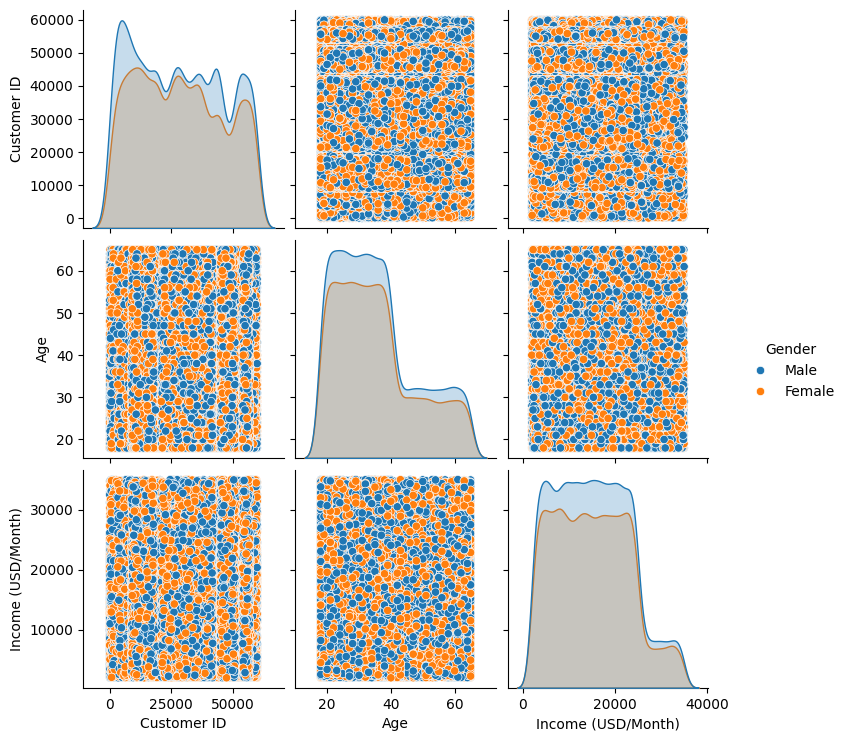

In [ ]:
sns.pairplot(cust_data,hue='Gender')

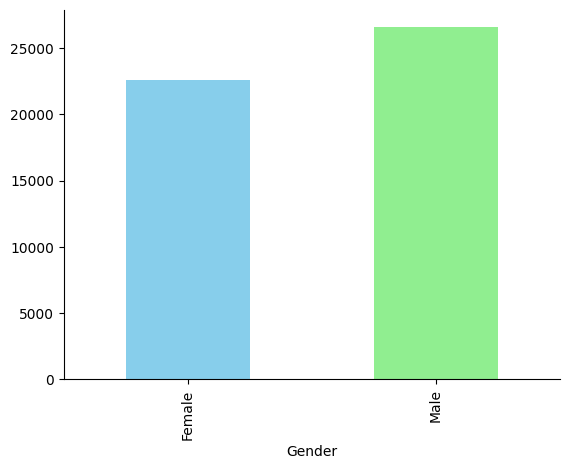

In [ ]:
#Gender distribution
colors=['skyblue','lightgreen']
cust_data.groupby('Gender').size().plot(kind='bar', color=colors)
plt.gca().spines[['top', 'right',]].set_visible(False)

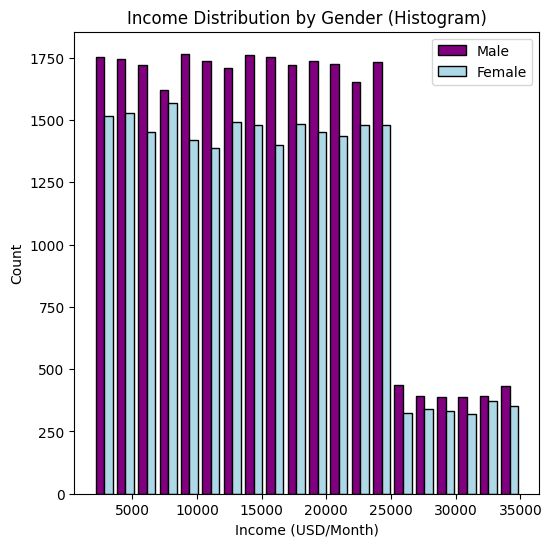

In [ ]:
#Income distribution by Gender
income_by_gender =cust_data.groupby('Gender')['Income (USD/Month)'].describe()

male_income = cust_data[cust_data['Gender'] == 'Male']['Income (USD/Month)']
female_income = cust_data[cust_data['Gender'] == 'Female']['Income (USD/Month)']

plt.figure(figsize=(6, 6))
plt.hist([male_income, female_income], label=['Male', 'Female'], bins=20, edgecolor='black',color=['purple','lightblue'])
plt.xlabel('Income (USD/Month)')
plt.ylabel('Count')
plt.title('Income Distribution by Gender (Histogram)')
plt.legend()
plt.show()

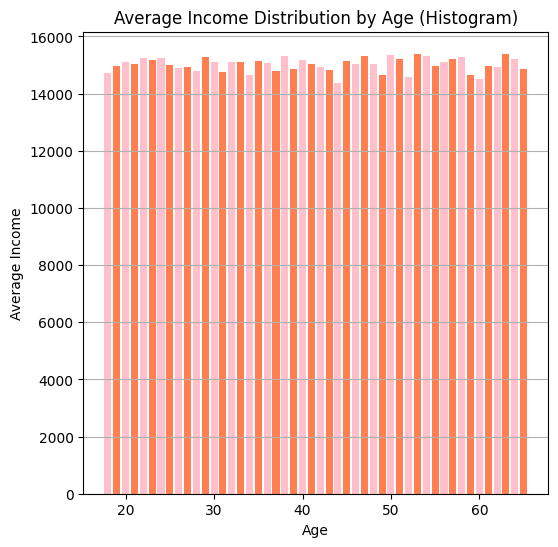

In [ ]:
#Avg Income Dist by Age
avg_income_by_age = cust_data.groupby('Age')['Income (USD/Month)'].mean()

plt.figure(figsize=(6, 6))
plt.bar(avg_income_by_age.index, avg_income_by_age.values,color=['pink','coral'])
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.title('Average Income Distribution by Age (Histogram)')
plt.grid(axis='y')
plt.show()

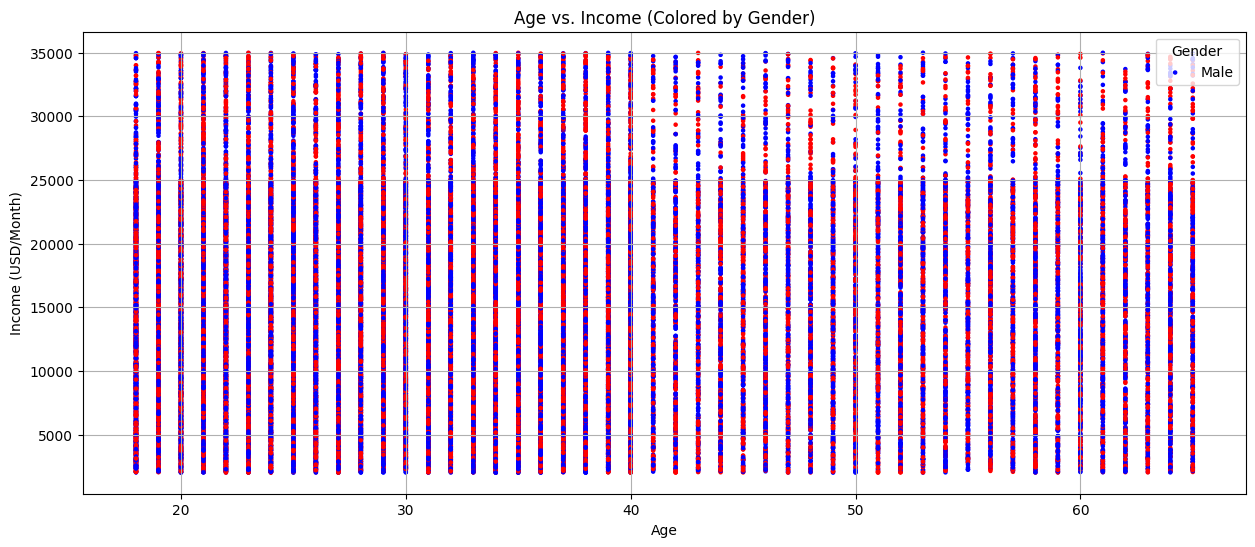

In [ ]:
color_map = {'Male': 'blue', 'Female': 'red'}

plt.figure(figsize=(15, 6))
plt.scatter(
    cust_data['Age'], cust_data['Income (USD/Month)'], s=5,
    c=[color_map[gender] for gender in cust_data['Gender']]
)
plt.xlabel('Age')
plt.ylabel('Income (USD/Month)')
plt.title('Age vs. Income (Colored by Gender)')
plt.grid(True)
plt.legend(title='Gender', labels=color_map.keys())
plt.show()


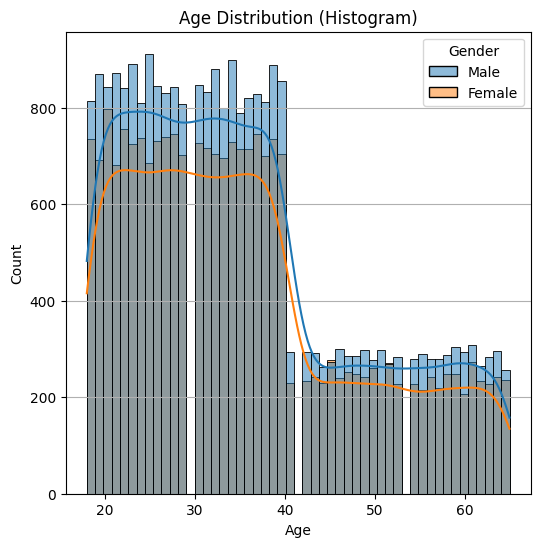

In [ ]:
#Age distribution in the dataset
plt.figure(figsize=(6, 6))
sns.histplot(data=cust_data, x='Age', kde=True, hue="Gender")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution (Histogram)')
plt.grid(axis='y')
plt.show()

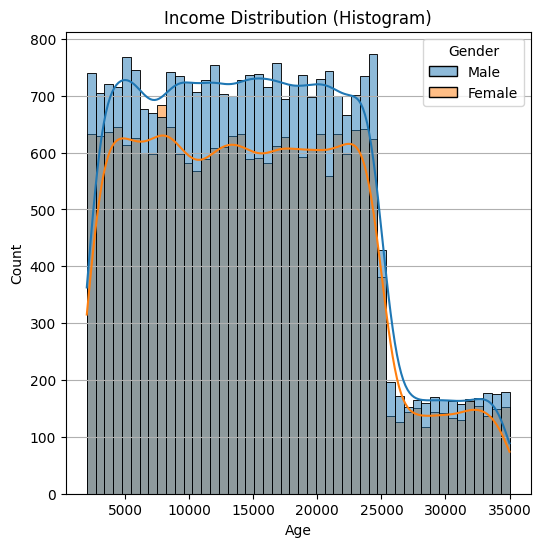

In [ ]:
#Income distribution in the dataset
plt.figure(figsize=(6, 6))
sns.histplot(data=cust_data, x='Income (USD/Month)', kde=True, hue='Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Income Distribution (Histogram)')
plt.grid(axis='y')
plt.show()

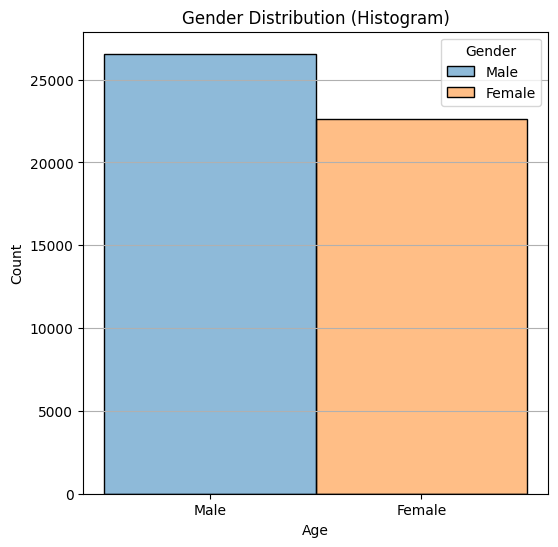

In [ ]:
#Gender distribution in the dataset
plt.figure(figsize=(6, 6))
sns.histplot(data=cust_data, x='Gender', hue='Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Gender Distribution (Histogram)')
plt.grid(axis='y')
plt.show()

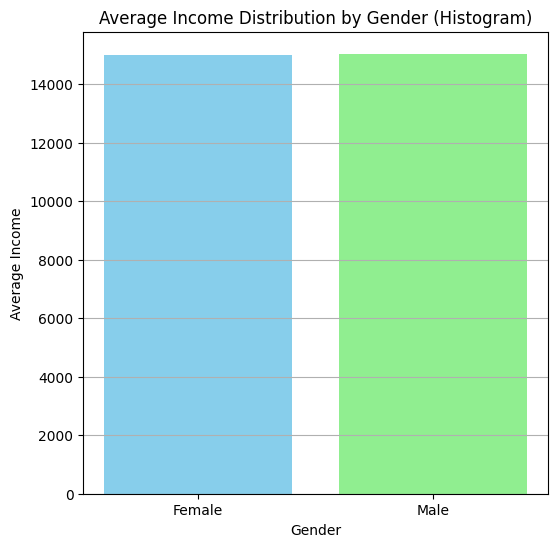

In [ ]:
#Avg income by gender
avg_income_by_gender = cust_data.groupby('Gender')['Income (USD/Month)'].mean()

plt.figure(figsize=(6, 6))
plt.bar(avg_income_by_gender.index, avg_income_by_gender.values, color=colors)
plt.xlabel('Gender')
plt.ylabel('Average Income')
plt.title('Average Income Distribution by Gender (Histogram)')
plt.grid(axis='y')
plt.show()

<ipython-input-424-c7f604346c08>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.violinplot(x='Gender', y='Age', data=cust_data, hue='Gender',color='purple')


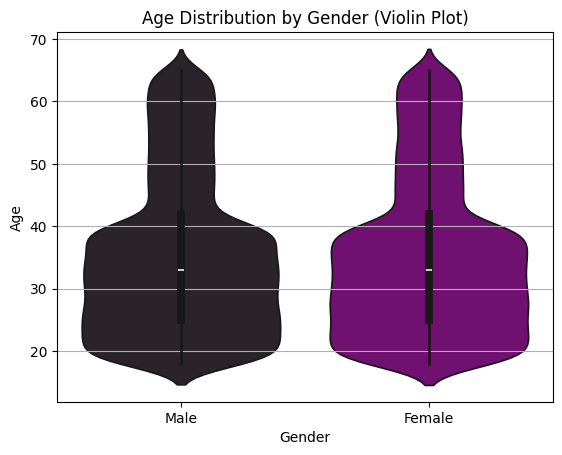

In [ ]:
#Age dist by gener
sns.violinplot(x='Gender', y='Age', data=cust_data, hue='Gender',color='purple')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender (Violin Plot)')
plt.grid(axis='y')
plt.show()


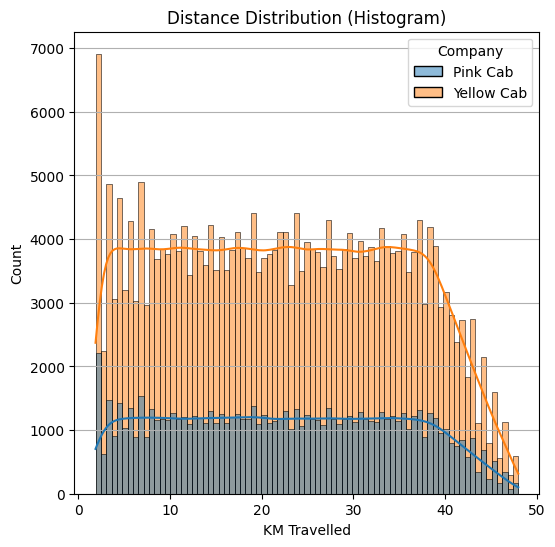

In [ ]:
#Distance Dist
plt.figure(figsize=(6, 6))
sns.histplot(data=cab_data, x='KM Travelled', kde=True, hue='Company')
plt.xlabel('KM Travelled')
plt.ylabel('Count')
plt.title('Distance Distribution (Histogram)')
plt.grid(axis='y')
plt.show()

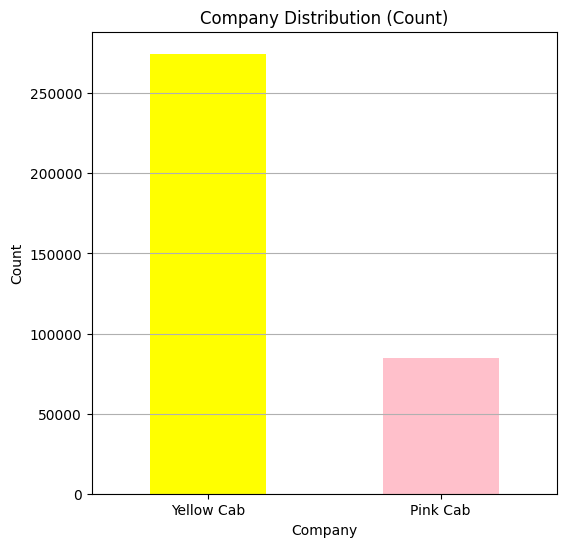

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64

In [ ]:
#Company Wise counts
company_counts = cab_data['Company'].value_counts()

plt.figure(figsize=(6, 6))
company_counts.plot(kind='bar', color=['yellow', 'pink'])
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Company Distribution (Count)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

company_counts

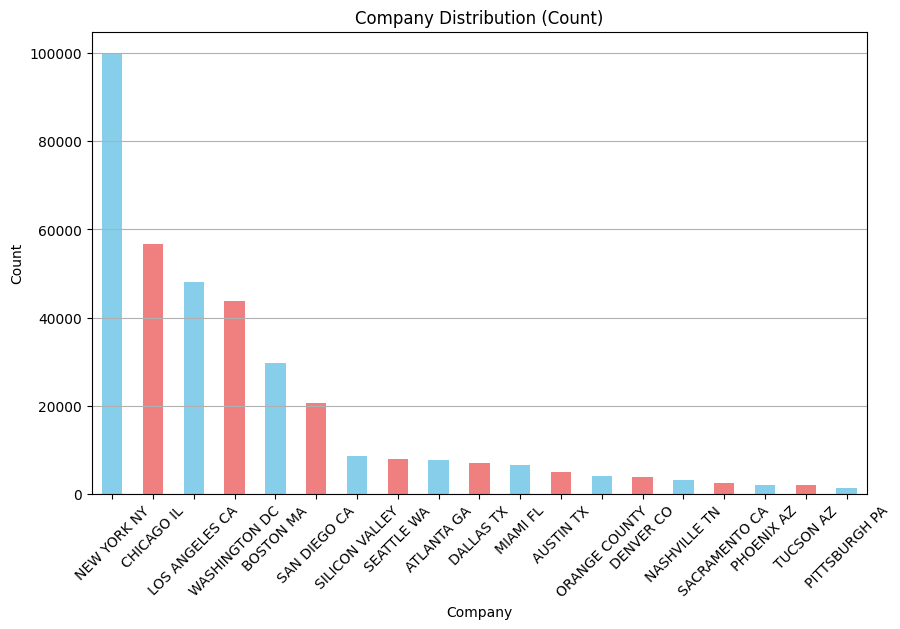

In [ ]:
#City Wise counts
city_counts = cab_data['City'].value_counts()  # Count occurrences of each company

plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])  # Adjust colors as desired
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Company Distribution (Count)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
plt.grid(axis='y')
plt.show()

Adding new features for further EDA

In [ ]:
cab_data['profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

cab_data['profit_per_Km'] = cab_data['profit'] / cab_data['KM Travelled']

cab_data['profit_pctg'] = (cab_data['profit'] / cab_data['profit'].sum()) * 100

cab_data['profit_pctg_per_km'] = (cab_data['profit'] / cab_data['KM Travelled']) * 100

print(cab_data[['profit', 'profit_per_Km', 'profit_pctg', 'profit_pctg_per_km']].describe())

              profit  profit_per_Km    profit_pctg  profit_pctg_per_km
count  359392.000000  359392.000000  359392.000000       359392.000000
mean      137.253198       6.083579       0.000278          608.357905
std       160.311840       5.543493       0.000325          554.349294
min      -220.060000      -4.998235      -0.000446         -499.823529
25%        28.012000       2.000385       0.000057          200.038470
50%        81.962000       4.466809       0.000166          446.680889
75%       190.030000       9.170006       0.000385          917.000642
max      1463.966000      41.115556       0.002968         4111.555556


                    KM Travelled  Price Charged  Cost of Trip  \
KM Travelled            1.000000       0.835753      0.981848   
Price Charged           0.835753       1.000000      0.859812   
Cost of Trip            0.981848       0.859812      1.000000   
profit_pctg_per_km     -0.000538       0.473222      0.031053   
profit                  0.462768       0.864154      0.486056   
profit_per_Km          -0.000538       0.473222      0.031053   
profit_pctg             0.462768       0.864154      0.486056   

                    profit_pctg_per_km    profit  profit_per_Km  profit_pctg  
KM Travelled                 -0.000538  0.462768      -0.000538     0.462768  
Price Charged                 0.473222  0.864154       0.473222     0.864154  
Cost of Trip                  0.031053  0.486056       0.031053     0.486056  
profit_pctg_per_km            1.000000  0.779330       1.000000     0.779330  
profit                        0.779330  1.000000       0.779330     1.000000  
profi

<Axes: >

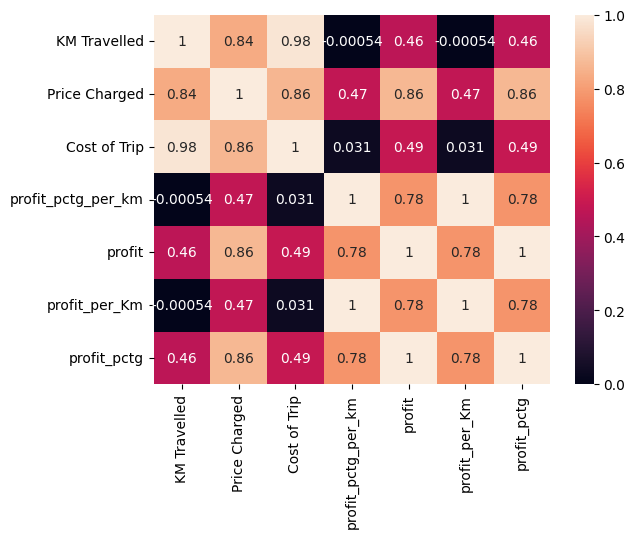

In [ ]:
correlation = cab_data[['KM Travelled', 'Price Charged', 'Cost of Trip', 'profit_pctg_per_km','profit', 'profit_per_Km', 'profit_pctg']].corr()
print(correlation)

sns.heatmap(correlation,annot=True)

As seen in the heatmap, Cost of Trip, KM Travelled and Profit per KM has negative correlation

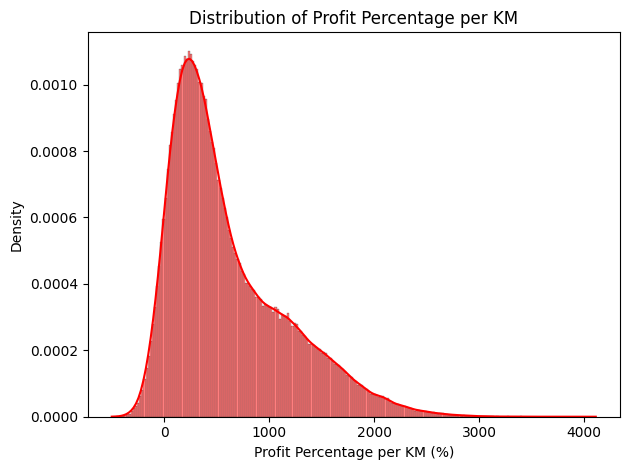

In [ ]:
#Distribution of Profit Percentage per KM
sns.histplot(
    x="profit_pctg_per_km",
    data=cab_data,
    stat="density",
    kde=True,
    color='r'
)
plt.xlabel("Profit Percentage per KM (%)")
plt.ylabel("Density")
plt.title("Distribution of Profit Percentage per KM")
plt.tight_layout()
plt.show()

<ipython-input-431-fa031c6cbc2e>:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


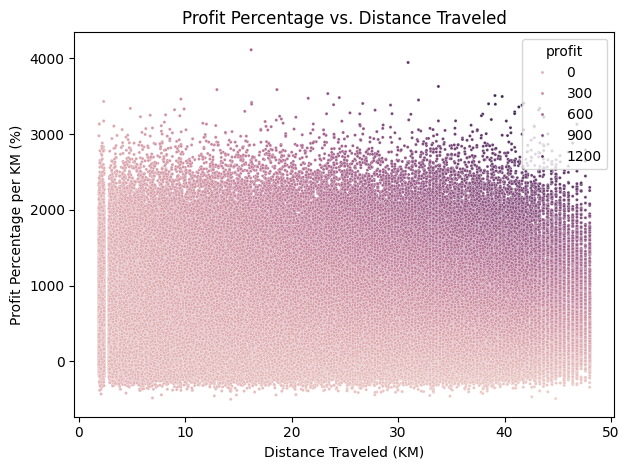

In [ ]:
#Profit Percentage vs. Distance Traveled
sns.scatterplot(
    x="KM Travelled",
    y="profit_pctg_per_km",
    data=cab_data,
    s=5,
    hue='profit'
)
plt.xlabel("Distance Traveled (KM)")
plt.ylabel("Profit Percentage per KM (%)")
plt.title("Profit Percentage vs. Distance Traveled")
plt.tight_layout()
plt.show()

As seen in scatter plot, Profit % increases as Distance increases

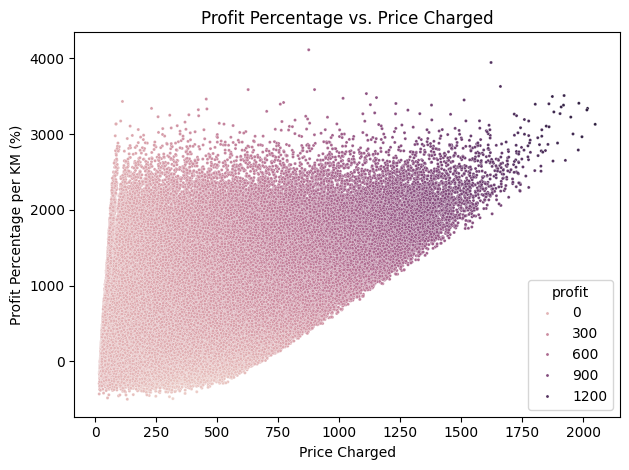

In [ ]:
#Profit Percentage vs. Price Charged
sns.scatterplot(
    x="Price Charged",
    y="profit_pctg_per_km",
    data=cab_data,
    s=5,
    hue='profit'
)
plt.xlabel("Price Charged")
plt.ylabel("Profit Percentage per KM (%)")
plt.title("Profit Percentage vs. Price Charged")
plt.tight_layout()
plt.show()

As seen in scatter plot, Profit % increases as Price increases

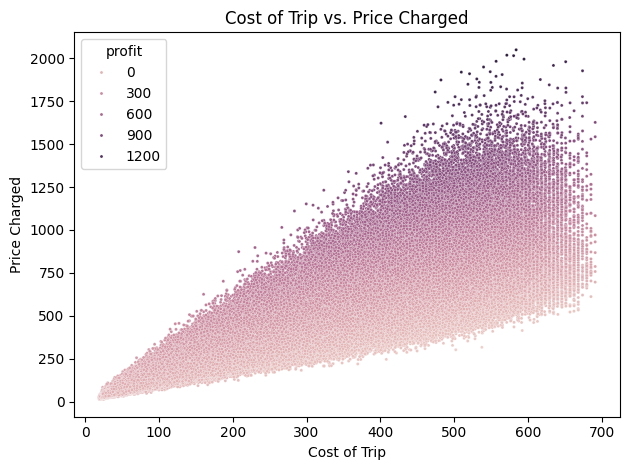

In [ ]:
#Cost of Trip vs. Price Charged
sns.scatterplot(
    x="Cost of Trip",
    y="Price Charged",
    data=cab_data,
    s=5,
    hue='profit'
)
plt.xlabel("Cost of Trip")
plt.ylabel("Price Charged")
plt.title("Cost of Trip vs. Price Charged")
plt.tight_layout()
plt.show()

<ipython-input-433-e2002fdd880c>:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


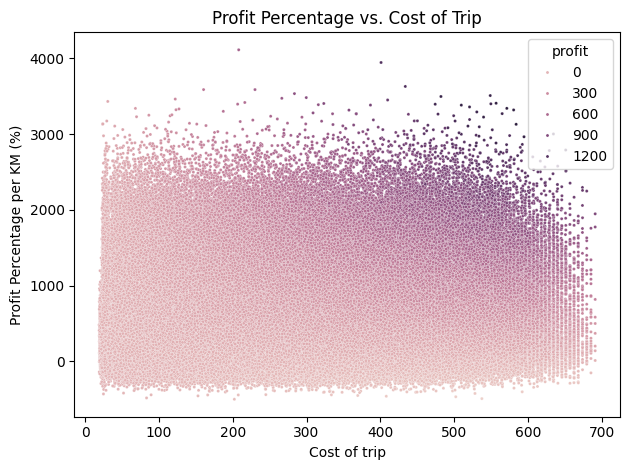

In [ ]:
sns.scatterplot(
    x="Cost of Trip",
    y="profit_pctg_per_km",
    data=cab_data,
    s=5,
    hue='profit'
)
plt.xlabel("Cost of trip")
plt.ylabel("Profit Percentage per KM (%)")
plt.title("Profit Percentage vs. Cost of Trip")
plt.tight_layout()
plt.show()

In [ ]:
avg_prices_costs = cab_data.groupby('Company')[['Price Charged', 'Cost of Trip']].mean()
avg_prices_costs

,Price Charged,Cost of Trip
Company,,
Pink Cab,310.800856,248.148682
Yellow Cab,458.181990,297.922004


array([<Axes: title={'center': 'Price Charged'}, xlabel='Company'>,
       <Axes: title={'center': 'Cost of Trip'}, xlabel='Company'>],
      dtype=object)

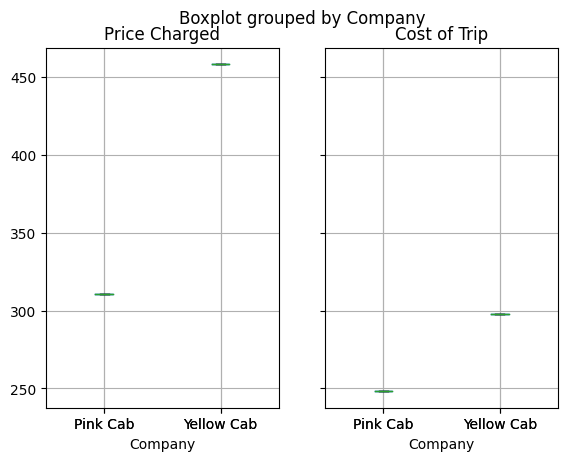

In [ ]:
avg_prices_costs.boxplot(column=['Price Charged', 'Cost of Trip'], by='Company')

The box plot clearly shows how both companies charge compared to the cost of trip

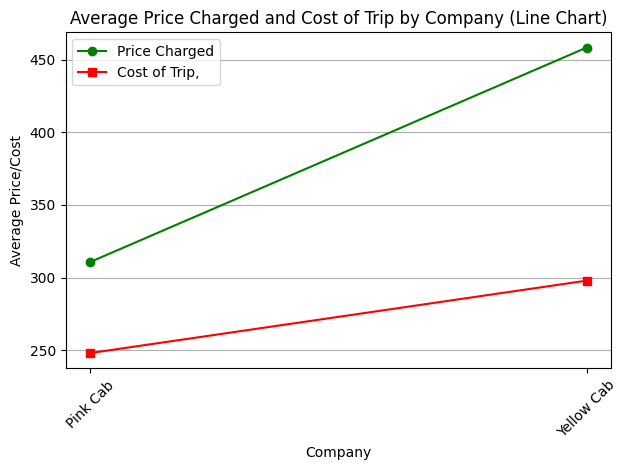

In [ ]:
#Average Price Charged and Cost of Trip by Company
plt.plot(avg_prices_costs.index, avg_prices_costs['Price Charged'], marker='o', label='Price Charged',color='green')
plt.plot(avg_prices_costs.index, avg_prices_costs['Cost of Trip'], marker='s', label='Cost of Trip,', color='red')
plt.xlabel('Company')
plt.ylabel('Average Price/Cost')
plt.title('Average Price Charged and Cost of Trip by Company (Line Chart)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


As seen in the line chart, Yellow cab Charge a lot higher than the actual cost of trip.

<Figure size 1500x600 with 0 Axes>

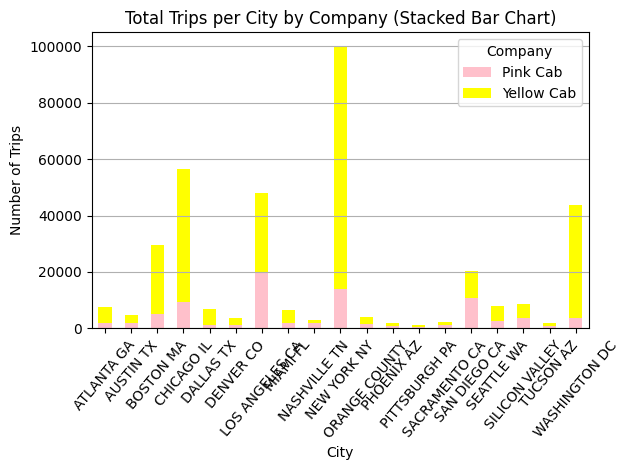

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


In [ ]:
#Total Trips per City by Company

city_company_counts = cab_data.groupby(['City', 'Company'])['Transaction ID'].count().unstack()

plt.figure(figsize=(15,6))
custom_colors = ['pink', 'yellow']
city_company_counts.plot(kind='bar', stacked=True, color=custom_colors)
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.title('Total Trips per City by Company (Stacked Bar Chart)')
plt.xticks(rotation=50)
plt.grid(axis='y')
plt.legend(title='Company')
plt.tight_layout()
plt.show()

city_company_counts

In [ ]:
city_data.head(3)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"


In [ ]:
#Converting object to ints
city_data['Population'] = city_data['Population'].str.strip()  # Remove leading/trailing spaces
city_data['Population'] = pd.to_numeric(city_data['Population'].str.replace(',', ''), errors='coerce')
city_data['Users'] = city_data['Users'].str.strip()  # Remove leading/trailing spaces
city_data['Users'] = pd.to_numeric(city_data['Users'].str.replace(',', ''), errors='coerce')

In [ ]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [ ]:
city_data.head(3)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132


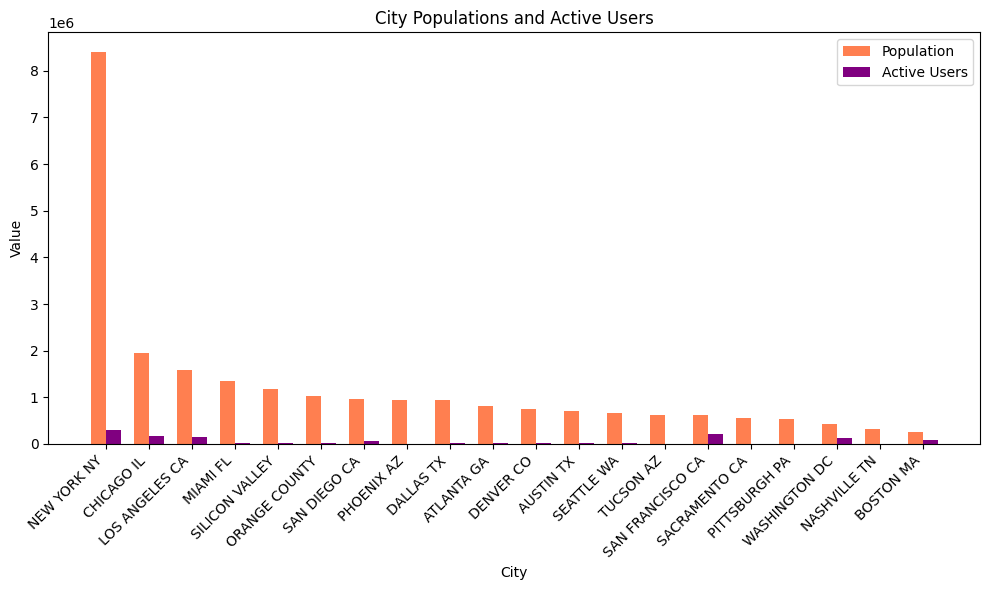

In [ ]:
#City populations vs Cab Users
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(city_data['City']))

plt.bar(index, city_data['Population'], bar_width, label='Population', color='coral')
plt.bar([p + bar_width for p in index], city_data['Users'], bar_width, label='Active Users', color='purple')
plt.xlabel('City')
plt.ylabel('Value')
plt.title('City Populations and Active Users')
plt.xticks([p + bar_width / 2 for p in index], city_data['City'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


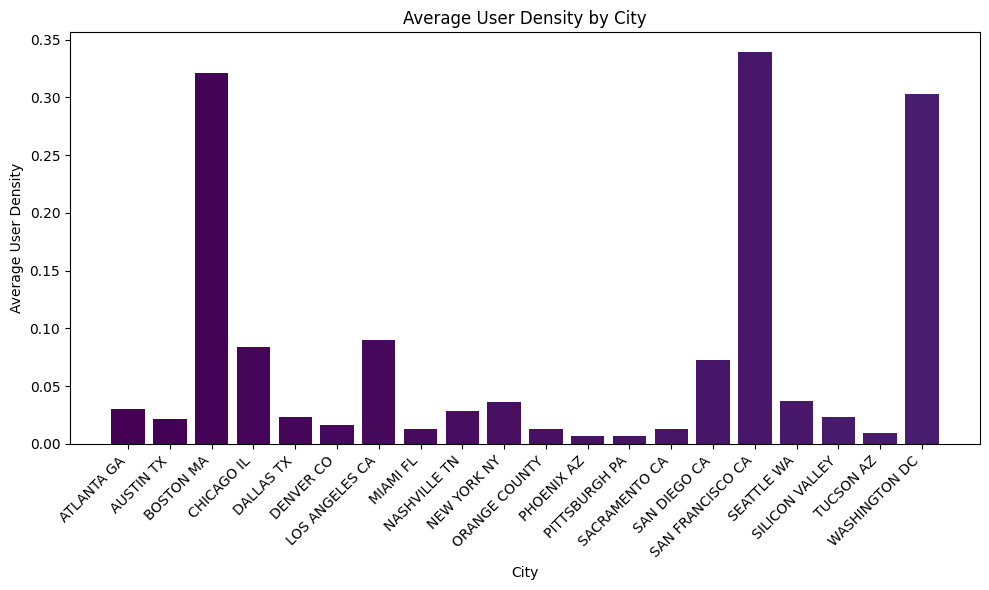

In [ ]:
#User Density
city_data['User Density'] = city_data['Users'] / city_data['Population']
avg_user_density = city_data.groupby('City')['User Density'].mean()

colors = plt.cm.viridis(range(len(avg_user_density)))

plt.figure(figsize=(10, 6))
plt.bar(avg_user_density.index, avg_user_density.values, color=colors)
plt.xlabel('City')
plt.ylabel('Average User Density')
plt.title('Average User Density by City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This graph represents the user density (average number of active users per unit population of that city).

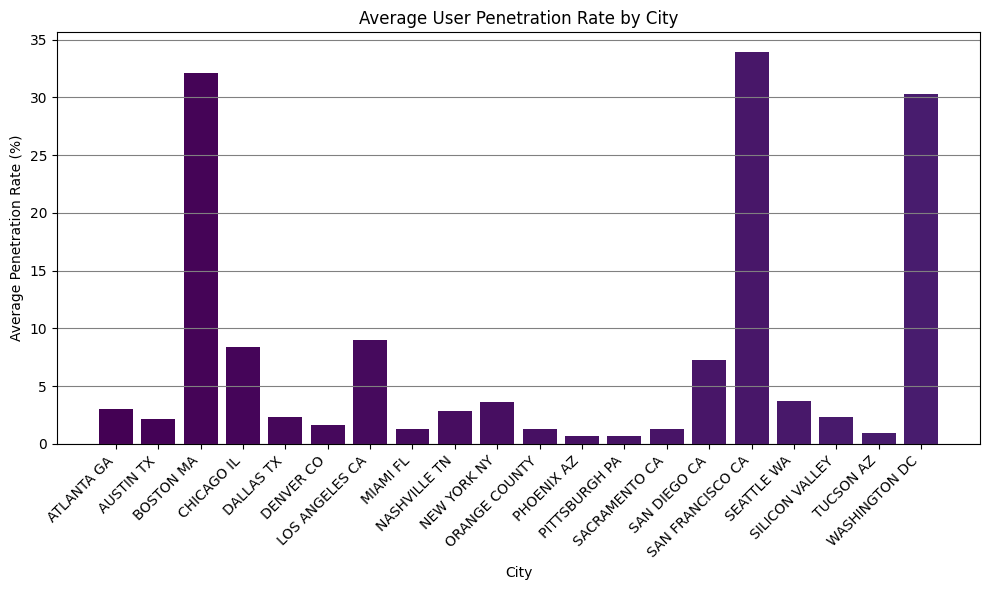

In [ ]:
#Avg Penetration Rate by city
city_data['Penetration Rate'] = (city_data['Users'] / city_data['Population']) * 100

avg_penetration_rate = city_data.groupby('City')['Penetration Rate'].mean()

colors = plt.cm.viridis(range(len(avg_penetration_rate)))

plt.figure(figsize=(10, 6))
plt.bar(avg_penetration_rate.index, avg_penetration_rate.values, color=colors)
plt.xlabel('City')
plt.ylabel('Average Penetration Rate (%)')
plt.title('Average User Penetration Rate by City')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y',color='grey')
plt.tight_layout()
plt.show()


This graph measure the proportion of a target market that adopts the cab service.

In [ ]:
#Correlation btw users and population
correlation = city_data['Population'].corr(city_data['Users'])
print("Correlation between Population and Active Users:", round(correlation,4))



Correlation between Population and Active Users: 0.7034


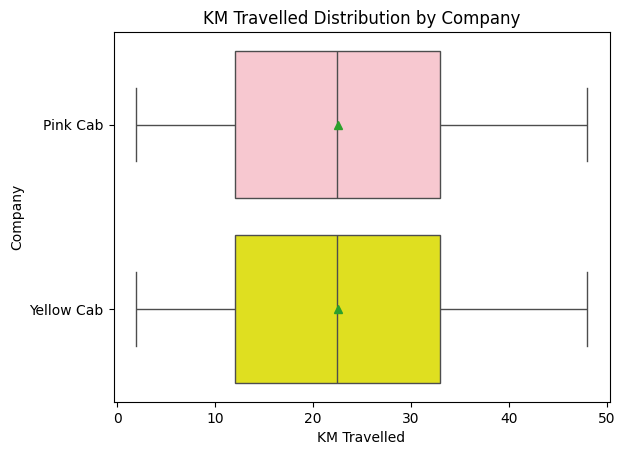

In [ ]:
#KM Travelled Distribution by Company
colors=['pink','yellow']
sns.boxplot(x="KM Travelled", y="Company",  hue="Company",  data=cab_data,palette=colors, showmeans=True,ax=None).set_title("KM Travelled Distribution by Company")
plt.show()

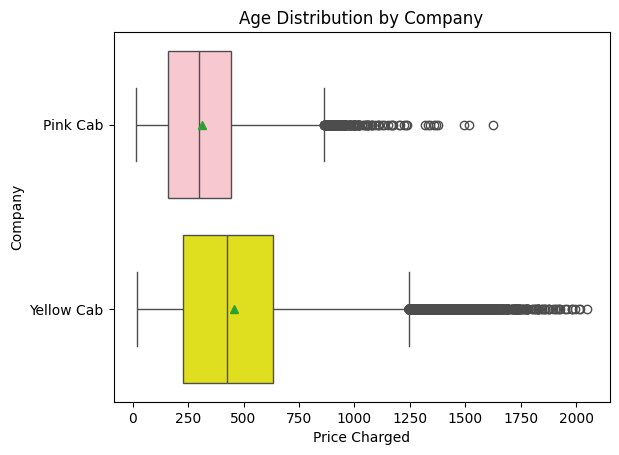

In [ ]:
#Price Charged Distribution by Company
colors=['pink','yellow']
sns.boxplot(x="Price Charged", y="Company",  hue="Company",  data=cab_data,palette=colors, showmeans=True,ax=None).set_title("Price Charged Distribution by Company")
plt.show()

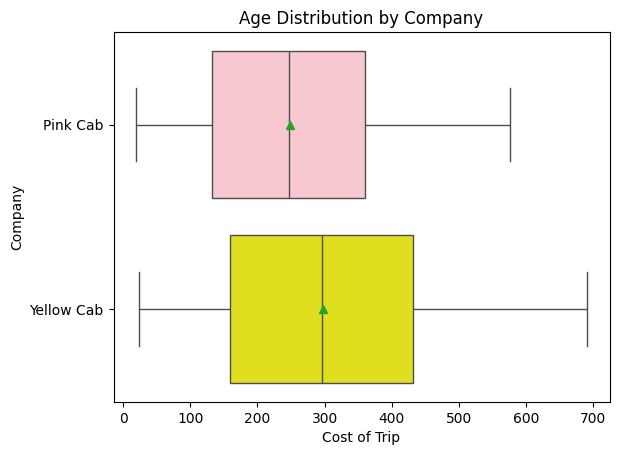

In [ ]:
#Cost of Trip Distribution by Company
colors=['pink','yellow']
sns.boxplot(x="Cost of Trip", y="Company",  hue="Company",  data=cab_data,palette=colors, showmeans=True,ax=None).set_title("Cost of Trip Distribution by Company")
plt.show()

<ipython-input-487-416f923ad048>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


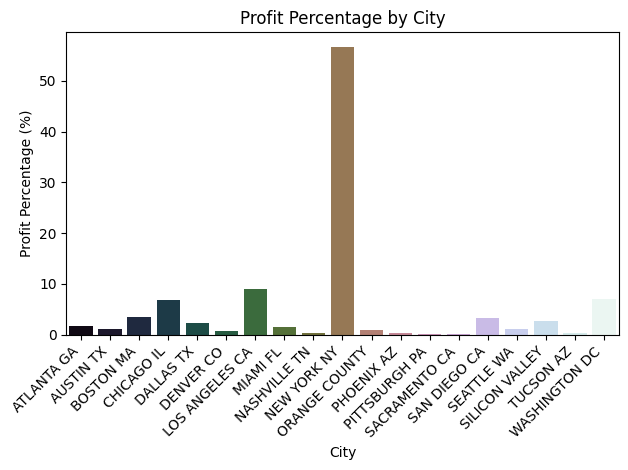

In [ ]:
#Profit % by City
city_profit_pctg = (cab_data.groupby('City')['profit'].sum() / cab_data['profit'].sum() * 100)

sns.barplot(x=city_profit_pctg.index, y=city_profit_pctg.values,palette='cubehelix')
plt.xlabel("City")
plt.ylabel("Profit Percentage (%)")
plt.title("Profit Percentage by City")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Extracting Year:

In [ ]:
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], format="%d-%m-%Y")

In [ ]:
cab_data['Year'] = cab_data['Date of Travel'].dt.year

In [ ]:
year_profit = (cab_data.groupby('Year')[['profit']].sum() / cab_data['profit'].sum() * 100)
print(year_profit)

         profit
Year           
2016  31.707349
2017  37.726536
2018  30.566115


In [ ]:
years = [2016, 2017, 2018]
profits = [31.707349, 37.726536, 30.566115]
year_profit = pd.Series(profits, index=years)
print(year_profit)


2016    31.707349
2017    37.726536
2018    30.566115
dtype: float64


<ipython-input-494-4e8edfe57006>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


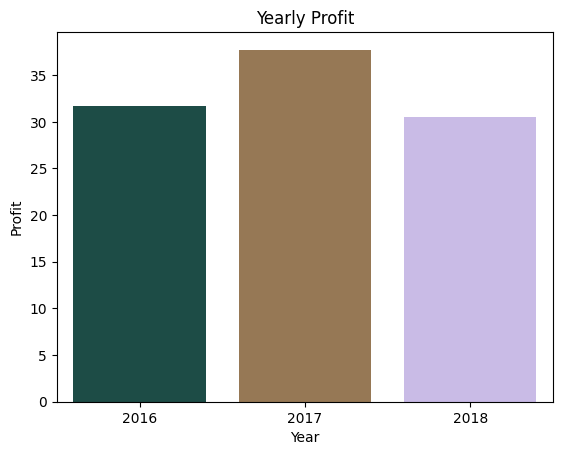

In [ ]:
sns.barplot(
    x=year_profit.index,
    y=year_profit.values,
    palette='cubehelix'
)

plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("Yearly Profit")
plt.show()


Year 2017 has the highest yealy profit.